<a href="https://colab.research.google.com/github/Rakshithabmsce/Assignment_UserReady/blob/main/load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib seaborn scikit-learn pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('load_data.csv')
df.head()

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type
0,01-01-2018 00:15,8.753692,2.95,0.0,0.0,73.210000,100.0,900.000000,Light_Load
1,01-01-2018 00:30,4.000000,4.46,0.0,0.0,66.770000,100.0,1800.000000,Light_Load
2,01-01-2018 00:45,3.240000,3.28,0.0,0.0,70.280000,100.0,8070.880991,Light_Load
3,01-01-2018 01:00,3.310000,3.56,0.0,0.0,68.090000,100.0,3600.000000,Light_Load
4,01-01-2018 01:15,3.820000,4.50,0.0,0.0,133.655666,NaN,4500.000000,Light_Load


In [5]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], dayfirst=True, errors='coerce')
df['Month'] = df['Date_Time'].dt.month


X = df.drop(['Date_Time', 'Load_Type'], axis=1)
y = df['Load_Type']
y_encoded = LabelEncoder().fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
df_sorted = df.sort_values('Date_Time')
X_sorted = X_scaled[df_sorted.index]
y_sorted = y_encoded[df_sorted.index]

split_point = int(len(df) * 0.9)
X_train, X_test = X_sorted[:split_point], X_sorted[split_point:]
y_train, y_test = y_sorted[:split_point], y_sorted[split_point:]

In [7]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1993
           1       0.84      0.78      0.81       648
           2       0.77      0.96      0.86       864

    accuracy                           0.89      3505
   macro avg       0.87      0.88      0.87      3505
weighted avg       0.90      0.89      0.89      3505



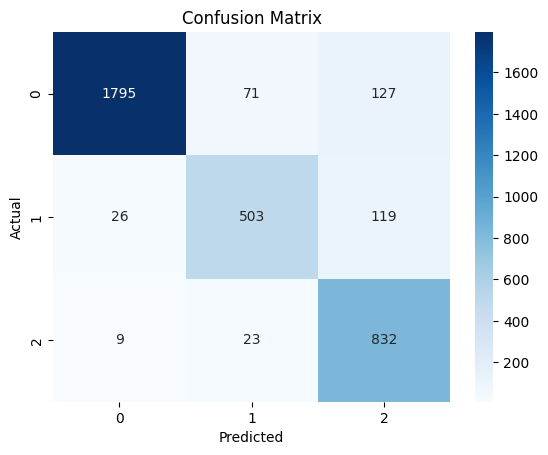

In [8]:
pred = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

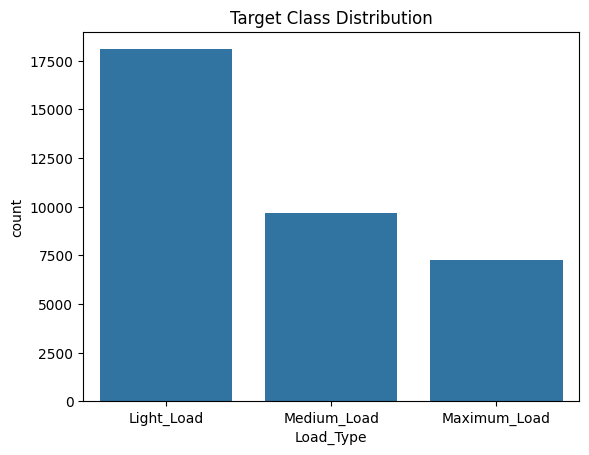

In [9]:
sns.countplot(x='Load_Type', data=df)
plt.title("Target Class Distribution")
plt.show()